In [1]:
import cv2
import numpy as np
import os
import h5py
import time
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model
from keras import applications
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
train_data_dir = 'input/train'
test_data_dir = 'input/test'

In [3]:
class_labels = os.listdir(test_data_dir)
print(class_labels)

['neg', 'pos']


In [4]:
for wdir in os.listdir('input'):
    print(wdir)
    wdir_total = 0
    for label in class_labels:
        total = len(os.listdir(os.path.join('input', wdir, label)))
        print(label, total)
        wdir_total +=total
    print(wdir,'-----',wdir_total)

test
neg 1187
pos 2430
test ----- 3617
train
neg 3894
pos 2630
train ----- 6524


In [5]:
nb_train_samples =6524
nb_test_samples = 3617
num_classes = 2
img_rows=64 
img_cols= 64
channel = 3

In [6]:
def load_training_data():
    labels = os.listdir(train_data_dir)
    print(labels)
    total = len(labels)
    
    X_train = np.ndarray((nb_train_samples, img_rows, img_cols, 3), dtype = np.uint8)
    Y_train = np.zeros((nb_train_samples,), dtype = np.uint8)
    
    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(train_data_dir, label))
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            img = cv2.imread(os.path.join(train_data_dir, label, image_name), 1)
            img = np.array(cv2.resize(img, (img_rows,img_cols)))
            X_train[i] = img
            Y_train[i] = j

            if i % 800 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1    
    print(str(i) +"-------"+ str(j))                
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], num_classes)

    np.save('dataset/imgs_train.npy', X_train, Y_train)
    return X_train, Y_train

In [7]:
def load_validation_data():
    labels = os.listdir(test_data_dir)
    

    X_test = np.ndarray((nb_test_samples, img_rows, img_cols, 3), dtype=np.uint8)
    Y_test = np.zeros((nb_test_samples,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_test = os.listdir(os.path.join(test_data_dir, label))
        total = len(image_names_test)
        print(label, total)
        for image_name in image_names_test:
            img = cv2.imread(os.path.join(test_data_dir, label, image_name), 1)

            img = np.array(cv2.resize(img, (img_rows,img_cols)))

            X_test[i] = img
            Y_test[i] = j

            if i % 200 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.');
    Y_test = np_utils.to_categorical(Y_test[:nb_test_samples], num_classes)

    np.save('dataset/imgs_test.npy', X_test, Y_test)
    
    return X_test, Y_test

In [8]:
#load data for training
x_train, y_train = load_training_data()
x_test, y_test = load_validation_data()

['neg', 'pos']
------------------------------
Creating training images...
------------------------------
neg 3894
Done: 0/3894 images
Done: 800/3894 images
Done: 1600/3894 images
Done: 2400/3894 images
Done: 3200/3894 images
pos 2630
Done: 4000/2630 images
Done: 4800/2630 images
Done: 5600/2630 images
Done: 6400/2630 images
6524-------2
Loading done.
Transform targets to keras compatible format.
------------------------------
Creating validation images...
------------------------------
neg 1187
Done: 0/1187 images
Done: 200/1187 images
Done: 400/1187 images
Done: 600/1187 images
Done: 800/1187 images
Done: 1000/1187 images
pos 2430
Done: 1200/2430 images
Done: 1400/2430 images
Done: 1600/2430 images
Done: 1800/2430 images
Done: 2000/2430 images
Done: 2200/2430 images
Done: 2400/2430 images
Done: 2600/2430 images
Done: 2800/2430 images
Done: 3000/2430 images
Done: 3200/2430 images
Done: 3400/2430 images
Done: 3600/2430 images
3617
Loading done.
Transform targets to keras compatible form

In [9]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(6524, 64, 64, 3) (6524, 2) (3617, 64, 64, 3) (3617, 2)


In [10]:
# R G B
print(x_train[0][0][0])

[17 16 18]


In [11]:
print(y_train[0])

[1. 0.]


In [12]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 127.5
x_test /= 127.5

In [13]:
print(x_train[0][0])

[[0.13333334 0.1254902  0.14117648]
 [0.1254902  0.10980392 0.10980392]
 [0.15686275 0.14901961 0.16470589]
 [0.6666667  0.69803923 0.78431374]
 [0.6745098  0.7294118  0.84705883]
 [0.6901961  0.7607843  0.87058824]
 [0.7137255  0.78431374 0.89411765]
 [0.83137256 0.89411765 1.027451  ]
 [0.49411765 0.5647059  0.6745098 ]
 [0.80784315 0.8784314  0.9882353 ]
 [0.8784314  0.9490196  1.0588236 ]
 [0.9882353  1.0509804  1.2       ]
 [1.1058824  1.2156863  1.3568628 ]
 [1.0196079  1.1137255  1.254902  ]
 [0.9647059  1.0509804  1.2078432 ]
 [0.85490197 0.91764706 1.027451  ]
 [0.9098039  0.95686275 1.0431373 ]
 [0.3764706  0.42352942 0.47843137]
 [0.23529412 0.24313726 0.27450982]
 [0.2509804  0.2509804  0.2509804 ]
 [0.25882354 0.25882354 0.3137255 ]
 [0.29803923 0.26666668 0.3137255 ]
 [0.30588236 0.2901961  0.3372549 ]
 [0.32156864 0.32156864 0.36862746]
 [0.36078432 0.3529412  0.38431373]
 [0.4        0.36862746 0.41568628]
 [0.40784314 0.39215687 0.39215687]
 [0.47843137 0.40784314 0.43

In [17]:
vgg16_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows,img_rows,channel))

In [18]:
vgg16_model = Model(vgg16_model.input, vgg16_model.get_layer('block5_conv2').output)

In [19]:
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

In [20]:
model = Model(inputs=vgg16_model.input, outputs=predictions)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [22]:
adam = Adam(lr=0.0001, decay=1e-6) 
size = 32
epoch = 5

In [23]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [24]:
model.fit(
    x_train,
    y_train,
    batch_size=size,
    epochs=epoch,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 6524 samples, validate on 3617 samples
Epoch 1/5
6524/6524 [==============================] - 1559s 239ms/step - loss: 0.0891 - acc: 0.9700 - val_loss: 2.7778 - val_acc: 0.6967
Epoch 2/5
6524/6524 [==============================] - 1555s 238ms/step - loss: 0.0214 - acc: 0.9946 - val_loss: 2.4318 - val_acc: 0.6638
Epoch 3/5
6524/6524 [==============================] - 1586s 243ms/step - loss: 4.2069e-04 - acc: 0.9998 - val_loss: 3.2400 - val_acc: 0.6821
Epoch 4/5
6524/6524 [==============================] - 1550s 238ms/step - loss: 2.9289e-04 - acc: 0.9998 - val_loss: 3.1275 - val_acc: 0.6505
Epoch 5/5
6524/6524 [==============================] - 1871s 287ms/step - loss: 2.7010e-04 - acc: 0.9998 - val_loss: 3.3863 - val_acc: 0.6544


In [25]:
y_pred = model.predict(x_test, batch_size=10, verbose=0)

In [26]:
print(y_pred)

[[7.0745611e-01 2.9254386e-01]
 [4.3463212e-02 9.5653683e-01]
 [6.8580657e-03 9.9314195e-01]
 ...
 [9.9999762e-01 2.4261003e-06]
 [9.9999750e-01 2.4450860e-06]
 [9.9999774e-01 2.2867632e-06]]


In [27]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

3617

In [28]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

3617

In [29]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [30]:
cm_plot_labels = class_labels

In [31]:
print(classification_report(y_true=y_true,y_pred=y_predict))

             precision    recall  f1-score   support

          0       0.48      0.57      0.52      1187
          1       0.77      0.70      0.73      2430

avg / total       0.67      0.65      0.66      3617



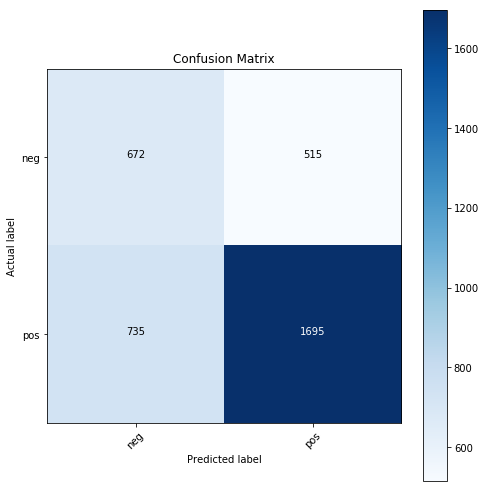

In [32]:
# to plot confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [33]:
# model performance
score = model.evaluate(x= x_test, y= y_test, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

3617/3617 [==============================] - 263s 73ms/step
Loss Value :  3.3863168589616075
Accuracy :  0.654409731821952


In [34]:
model_structure = model.to_json()
f = Path("model/model_structure.json")
f.write_text(model_structure)

10868

In [35]:
model.save_weights("model/model_weights.h5")

In [36]:
def keys(f):
    return [items for items in f.keys()]

In [37]:
filename = "model/model_weights.h5"
h5 = h5py.File(filename,'r')
keys(h5)

['block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'dense_1',
 'dropout_1',
 'global_average_pooling2d_1',
 'input_1',
 'predictions']

In [38]:
h5.close()